## Pandas

### Instructions

This assignment will be done completely inside this Jupyter notebook with answers placed in the cell provided.

All python imports that are needed shown.

Follow all the instructions in this notebook to complete these tasks.    

Make sure the CSV data files is in the same folder as this notebook - alumni.csv, groceries.csv

In [21]:
# Imports needed to complete this assignment
import pandas as pd
import numpy as np

### Question 1 :  Import CSV file (1 Mark)


Write code to load the alumni csv dataset into a Pandas DataFrame called 'alumni'.


In [58]:
#q1 (1)
alumni = pd.read_csv('alumni.csv')
alumni

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000"
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000"
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000"
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000"
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000"
...,...,...,...,...,...,...,...,...
83,2007,Male,Single,Standard Diploma,No,75000,12066,"$16,000"
84,2008,M,Single,College Prep Diploma,Yes,65000,12066,"$72,000"
85,2009,Male,Married,Standard Diploma,No,75000,12066,"$46,000"
86,2005,Female,Divorced,Standard Diploma,Yes,100000,12067,"$32,000"


### Question 2 :  Understand the data set (5 Marks)

Use the following pandas commands to understand the data set: a) head, b) tail, c) dtypes, d) info, e) describe 

In [71]:
#a) (1)
alumni.head()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000"
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000"
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000"
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000"
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000"


In [72]:
#b) (1)
alumni.tail()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
83,2007,Male,Single,Standard Diploma,No,75000,12066,"$16,000"
84,2008,M,Single,College Prep Diploma,Yes,65000,12066,"$72,000"
85,2009,Male,Married,Standard Diploma,No,75000,12066,"$46,000"
86,2005,Female,Divorced,Standard Diploma,Yes,100000,12067,"$32,000"
87,2006,Male,Married,Standard Diploma,Yes,75000,12067,"$67,000"


In [21]:
#c) (1)
print(df.dtypes)


Year Graduated     int64
Gender            object
Marital Status    object
Diploma Type      object
Defaulted         object
Salary             int64
Fee                int64
Savings ($)       object
dtype: object


In [74]:
#d) (1)
alumni.describe()

,Year Graduated,Salary,Fee
count,88.000000,88.000000,88.000000
mean,2006.477273,84090.909091,11708.727273
std,1.560852,21234.128008,1110.647949
min,2004.000000,35000.000000,10869.000000
25%,2005.000000,75000.000000,10968.000000
50%,2006.500000,75000.000000,11696.000000
75%,2008.000000,90000.000000,12058.250000
max,2009.000000,160000.000000,20960.000000


In [75]:
#e) (1)
alumni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year Graduated  88 non-null     int64 
 1   Gender          88 non-null     object
 2   Marital Status  88 non-null     object
 3   Diploma Type    88 non-null     object
 4   Defaulted       88 non-null     object
 5   Salary          88 non-null     int64 
 6   Fee             88 non-null     int64 
 7   Savings ($)     88 non-null     object
dtypes: int64(3), object(5)
memory usage: 5.6+ KB


### Question 3 :  Cleaning the data set - part A (3 Marks)

a) Use clean_currency method below to strip out commas and dollar signs from Savings ($) column and put into a new column called 'Savings'.

In [26]:
def clean_currency(curr):
    return float(curr.replace(",", "").replace("$", ""))

clean_currency("$66,000")

 

66000.0

In [25]:
#a) (2)
import pandas as pd

def clean_currency(val):
    # remove commas and dollar signs
    return val.replace(',','').replace('$','')

df = pd.DataFrame({'Savings ($)': ["$1,000", "$2,500", "$3,800"]})


df['Savings'] = df['Savings ($)'].apply(clean_currency)
print(df)

  Savings ($) Savings
0      $1,000    1000
1      $2,500    2500
2      $3,800    3800


b) Uncomment 'alumni.dtypes.Savings' to check that the type change has occurred

In [29]:
#b) (1)
#alumni.dtypes.Savings
print(df.dtypes.Savings)


object


### Question 4 :  Cleaning the data set - part B (5 Marks)

a) Run the 'alumni["Gender"].value_counts()' to see the incorrect 'M' fields that need to be converted to 'Male'

In [37]:
# a) (1)
df = pd.DataFrame({'Gender': ['M','F','M','M','F']})

print(df["Gender"].value_counts())

df['Gender'] = df['Gender'].replace({'M': 'Male'})



M    3
F    2
Name: Gender, dtype: int64


b) Now use a '.str.replace' on the 'Gender' column to covert the incorrect 'M' fields. Hint: We must use ^...$ to restrict the pattern to match the whole string. 

In [40]:
# b) (1)
import pandas as pd

df = pd.DataFrame({'Gender': ['M','F','M','M','F']})

# Using regular expression to match whole string
df['Gender'] = df['Gender'].str.replace(r'^M$', 'Male')

print(df["Gender"].value_counts())



Male    3
F       2
Name: Gender, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_3364\2020027710.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Gender'] = df['Gender'].str.replace(r'^M$', 'Male')


In [13]:
# b) (1)


c) That didn't the set alumni["Gender"] column however. You will need to update the column when using the replace command 'alumni["Gender"]=<replace command>', show how this is done below

In [42]:
# c) (1)
import re

df = pd.DataFrame({'Gender': ['M','F','M','M','F']})
df["Gender"]=df["Gender"].str.replace(r'^M$', 'Male')


print(df)


  Gender
0   Male
1      F
2   Male
3   Male
4      F


C:\Users\HP\AppData\Local\Temp\ipykernel_3364\2395279468.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Gender"]=df["Gender"].str.replace(r'^M$', 'Male')


d) You can set it directly by using the df.loc command, show how this can be done by using the 'df.loc[row_indexer,col_indexer] = value' command to convert the 'M' to 'Male'

In [43]:
# d) (1)
import pandas as pd

df = pd.DataFrame({'Gender': ['M','F','M','M','F']})

# Use df.loc to update the 'M' to 'Male' in the 'Gender' column
df.loc[df['Gender'] == 'M', 'Gender'] = 'Male'

print(df)


  Gender
0   Male
1      F
2   Male
3   Male
4      F


e) Now run the 'value_counts' for Gender again to see the correct columns - 'Male' and 'Female' 

In [44]:
# e) (1)
df = pd.DataFrame({'Gender': ['M','F','M','M','F']})
df.loc[df['Gender'] == 'M', 'Gender'] = 'Male'
df.loc[df['Gender'] == 'F', 'Gender'] = 'Female'
print(df["Gender"].value_counts())


Male      3
Female    2
Name: Gender, dtype: int64


### Question 5 :  Working with the data set (4)

a) get the median, b) mean and c) standard deviation for the 'Salary' column

In [32]:
# a)(1)
import pandas as pd

df = pd.DataFrame({'Salary': [3000, 4000, 7000, 5500, 20000, 50000]})

median = df['Salary'].median()

print("Median: ", median)

Median:  6250.0


In [48]:
# b)(1)
import pandas as pd

df = pd.DataFrame({'Salary': [35000, 45000, 72000, 55000, 48000, 60000]})

mean = df['Salary'].mean()

print("Mean: ", mean)


Mean:  52500.0


In [50]:
# c)(1)
import pandas as pd

df = pd.DataFrame({'Salary': [35000, 45000, 72000, 55000, 48000, 60000]})
std = df['Salary'].std()
print("Standard deviation: ", std)


Standard deviation:  12849.12448379266


d) identify which alumni paid more than $15000 in fees, using the 'Fee' column

In [39]:
# d) (1)
import pandas as pd
paid_above_$15000 = alumni[alumni["Fee"] >$15000]
paid_above_$15000.head()

SyntaxError: invalid syntax (225231253.py, line 3)

### Question 6 :  Visualise the data set (4 Marks)

a) Using the 'Diploma Type' column, plot a bar chart and show its value counts.

<AxesSubplot:>

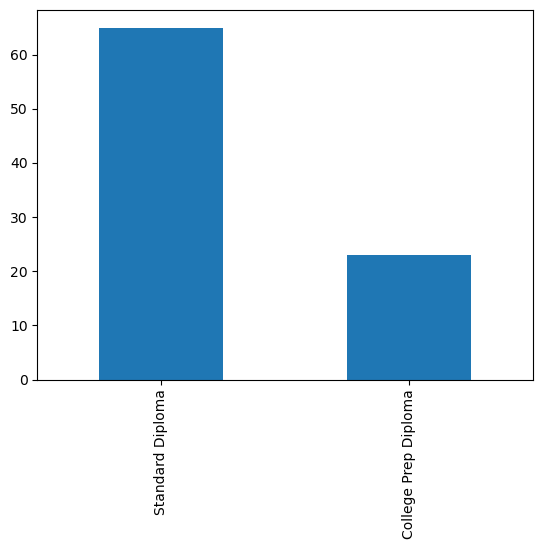

In [41]:
#a) (1)
alumni['Diploma Type'].value_counts().plot(kind='bar')

b) Now create a box plot comparison between 'Savings' and 'Salary' columns

KeyError: "['Savings($)'] not in index"

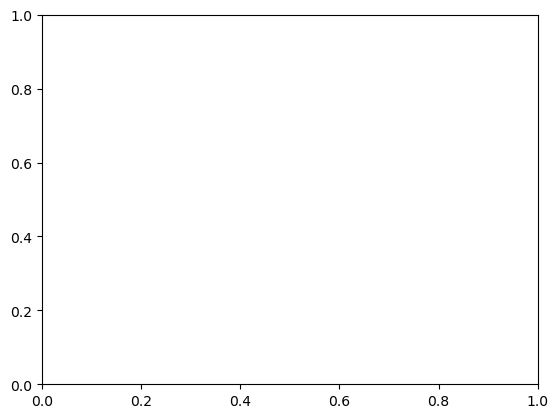

In [43]:
#b) (1)
import matplotlib.pyplot as plt
df.boxplot(column=['Savings($)', 'Salary'])
plt.show()


c) Generate a histogram with the 'Salary' column and use 12 bins.

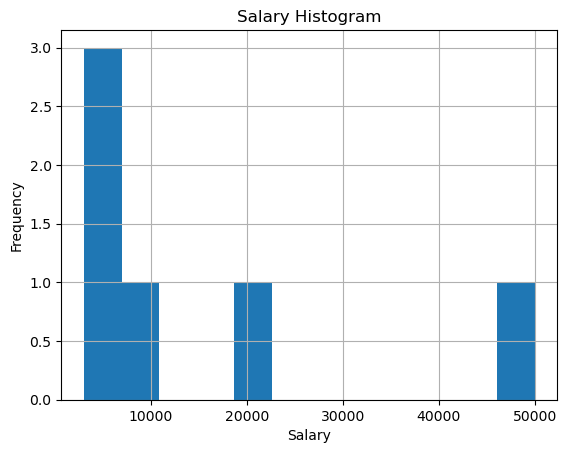

In [44]:
#c) (1)
import matplotlib.pyplot as plt
df['Salary'].hist(bins=12)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Histogram')
plt.show()


d) Generate a scatter plot comparing 'Salary' and 'Savings' columns.

KeyError: 'Savings'

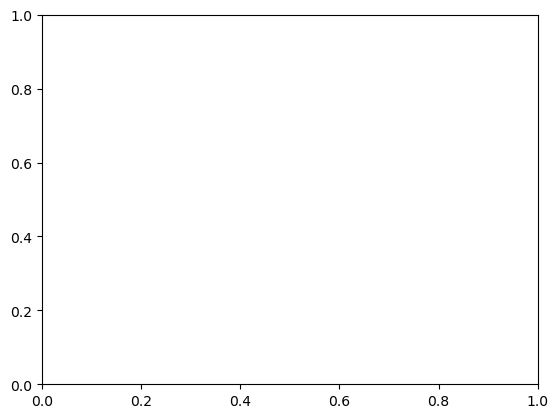

In [45]:
#d) (1)
import matplotlib.pyplot as plt
df.plot(x='Salary', y='Savings', kind='scatter')
plt.xlabel('Salary')
plt.ylabel('Savings')
plt.title('Salary vs Savings')
plt.show()


### Question 7 :  Contingency Table (2 Marks)

Using both the 'Martial Status' and 'Defaulted' create a contingency table. Hint: crosstab

In [48]:
# Q7 (2)
pd.crosstab(df['Martial Status'], df['Defaulted'], margins=True)


KeyError: 'Martial Status'